# Setting up MV

In [147]:
from model.master_transmuter import *
from scrape.scraper import *
from query import *
import unit_tests
import pandas as pd
import numpy as np

In [148]:
mythic_df = pd.read_csv("data/all_vintage_cards-mythic_recent.csv")
rare_df = pd.read_csv("data/all_vintage_cards-rare_recent.csv")
print('Mythic cards: {}'.format(mythic_df.shape[0]))
print('Rare cards: {}'.format(rare_df.shape[0]))

Mythic cards: 568
Rare cards: 4215


In [149]:
mythic_df.sample(10)

,Unnamed: 0,id,cardname,setname,type_line,mana_cost,rarity,oracle_text,power,toughness,loyalty,cmc,set,color_identity,colors,reprint,layout,legalities,timestamp,price
206,206,b3205343-03f8-4ffd-8bbc-6df1ae5621b4,Aether Vial,Kaladesh Inventions,Artifact,{1},mythic,"At the beginning of your upkeep, you may put a...",NaN,NaN,NaN,1.0,mps,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1529083915409,210.0
222,222,0cb33b46-4d1b-4f97-bfdc-d815aee111da,Mana Crypt,Eternal Masters,Artifact,{0},mythic,"At the beginning of your upkeep, flip a coin. ...",NaN,NaN,NaN,0.0,ema,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542100603988,119.2
19,19,adeccd88-8dc0-4cc1-943f-27d540d248bb,The Immortal Sun,Rivals of Ixalan,Legendary Artifact,{6},mythic,Players can't activate planeswalkers' loyalty ...,NaN,NaN,NaN,6.0,rix,[],[],False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542070311058,18.0
435,435,dfddc025-4396-4d88-8d72-6c06ea7125f1,Sword of Fire and Ice,Modern Masters,Artifact — Equipment,{3},mythic,Equipped creature gets +2/+2 and has protectio...,NaN,NaN,NaN,3.0,mma,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542036649370,51.0
276,276,1b8de79d-5efe-4e21-8614-786689fcad58,Strip Mine,Zendikar Expeditions,Land,NaN,mythic,"{T}: Add {C}.\r\r\n{T}, Sacrifice Strip Mine: ...",NaN,NaN,NaN,0.0,exp,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1529083810221,130.0
45,45,aff10db6-f9bf-4fc8-b3ef-c4c11f192f53,Archangel of Thune,Iconic Masters,Creature — Angel,{3}{W}{W},mythic,Flying\r\r\nLifelink (Damage dealt by this cre...,3,4,NaN,5.0,ima,['W'],['W'],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542046292825,10.5
177,177,01d0d061-e57a-4fe4-9e46-e4f369e564b3,Ornithopter,Kaladesh Inventions,Artifact Creature — Thopter,{0},mythic,Flying,0,2,NaN,0.0,mps,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1528417917077,120.0
490,490,0806adab-6a08-411b-b249-e1c58ade354b,"Vorinclex, Voice of Hunger",New Phyrexia,Legendary Creature — Praetor,{6}{G}{G},mythic,"Trample\r\r\nWhenever you tap a land for mana,...",7,6,NaN,8.0,nph,['G'],['G'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542096000000,10.8
180,180,9c57c6ee-1e97-4005-bae0-7df86b2cdc27,Defense Grid,Kaladesh Inventions,Artifact,{2},mythic,Each spell costs {3} more to cast except durin...,NaN,NaN,NaN,2.0,mps,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1529109117069,95.0
352,352,fc3a4e7d-6667-4c2f-b6b4-484f401b0455,Soulfire Grand Master,Fate Reforged,Creature — Human Monk,{1}{W},mythic,Lifelink\r\r\nInstant and sorcery spells you c...,2,2,NaN,2.0,frf,"['R', 'U', 'W']",['W'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542087238664,1.4


In [152]:
clean_mythic_df = mythic_df[~pd.isnull(mythic_df['price'])]
clean_rare_df = rare_df[~pd.isnull(rare_df['price'])]

In [153]:
clean_mythic_df.describe()

,Unnamed: 0,cmc,timestamp,price
count,568.000000,568.000000,5.680000e+02,568.000000
mean,283.500000,4.554577,1.539819e+12,23.024120
std,164.111751,2.336848,4.992627e+09,50.145228
min,0.000000,0.000000,1.523362e+12,0.200000
25%,141.750000,3.000000,1.542027e+12,1.100000
50%,283.500000,5.000000,1.542058e+12,4.000000
75%,425.250000,6.000000,1.542087e+12,14.325000
max,567.000000,12.000000,1.542101e+12,450.000000


In [154]:
clean_rare_df.describe()

,Unnamed: 0,loyalty,cmc,timestamp,price
count,4215.000000,4.000000,4215.000000,4.215000e+03,4215.000000
mean,2107.000000,4.500000,3.927402,1.540199e+12,6.058197
std,1216.910021,1.290994,2.059381,6.214516e+09,37.014310
min,0.000000,3.000000,0.000000,1.441591e+12,0.100000
25%,1053.500000,3.750000,3.000000,1.542026e+12,0.200000
50%,2107.000000,4.500000,4.000000,1.542084e+12,0.500000
75%,3160.500000,5.250000,5.000000,1.542096e+12,2.500000
max,4214.000000,6.000000,16.000000,1.542108e+12,1000.000000


## Price EDA

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

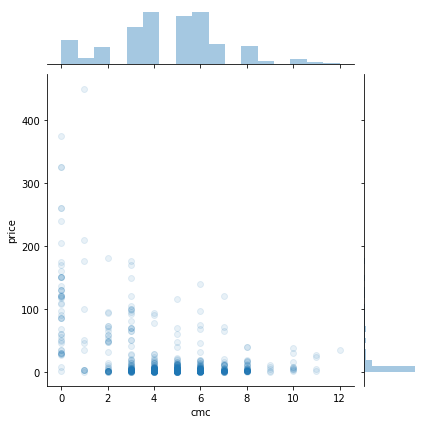

In [157]:
sns.jointplot(clean_mythic_df['cmc'], clean_mythic_df['price'], joint_kws={'alpha':0.1})

(0, 80)

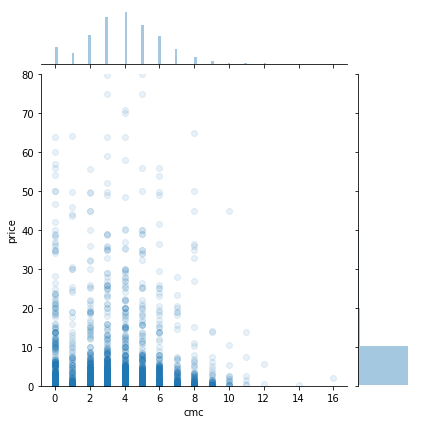

In [158]:
sns.jointplot(clean_rare_df['cmc'].astype('int'), clean_rare_df['price'], joint_kws={'alpha':0.1}, marginal_kws={'bins':100})
plt.ylim(0,80)

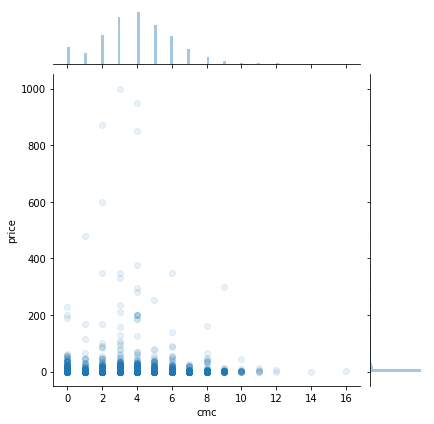

In [160]:
sns.jointplot(clean_rare_df['cmc'].astype('int'), clean_rare_df['price'], joint_kws={'alpha':0.1}, marginal_kws={'bins':100})

### TRANSFORM

In [161]:
aberrant_researcher = CreatureFeatureTransformer()

In [172]:
perfected_form = aberrant_researcher.transform(clean_mythic_df)

In [173]:
perfected_form.sample(10)

,Unnamed: 0,id,cardname,setname,type_line,mana_cost,rarity,oracle_text,power,toughness,...,colors,reprint,layout,legalities,timestamp,price,pt_type,p:t,avg_pt,cmc:apt
34,34,1ba50b62-710e-4c92-9e02-736c1a987bb9,Urabrask the Hidden,Iconic Masters,Legendary Creature — Praetor,{3}{R}{R},mythic,Creatures you control have haste.\r\r\nCreatur...,4,4,...,['R'],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542046292841,2.8,static,1.00,4.0,1.250000
313,313,82c04014-91f9-4197-b4b4-f62c4739a5c2,Demonic Pact,Magic Origins,Enchantment,{2}{B}{B},mythic,"At the beginning of your upkeep, choose one th...",0,0,...,['B'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542053149773,0.4,none,NaN,NaN,NaN
49,49,c1fd4101-d531-43aa-9cb6-79e36a8121d8,"Vona, Butcher of Magan",Ixalan,Legendary Creature — Vampire Knight,{3}{W}{B},mythic,"Vigilance, lifelink\r\r\n{T}, Pay 7 life: Dest...",4,4,...,"['B', 'W']",False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542047055727,2.8,static,1.00,4.0,1.250000
140,140,f3e7a886-2593-4e6e-b9da-d7cb417cba08,"Ludevic, Necro-Alchemist",Commander 2016,Legendary Creature — Human Wizard,{1}{U}{R},mythic,"At the beginning of each player's end step, th...",1,4,...,"['R', 'U']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1529154007273,1.3,static,0.25,2.5,1.200000
438,438,5ea82414-3f16-4c8c-8668-1f1ee7566c7b,Tarmogoyf,Modern Masters,Creature — Lhurgoyf,{1}{G},mythic,Tarmogoyf's power is equal to the number of ca...,0,0,...,['G'],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542036649368,58.0,variable,NaN,NaN,NaN
367,367,bf472be9-f375-455e-a800-7af5258f4e59,Ob Nixilis of the Black Oath,Commander 2014,Legendary Planeswalker — Nixilis,{3}{B}{B},mythic,+2: Each opponent loses 1 life. You gain life ...,0,0,...,['B'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542088892994,5.1,none,NaN,NaN,NaN
84,84,2922b976-7beb-4c68-b39e-1b66d5c6f65e,Glorious End,Amonkhet,Instant,{2}{R},mythic,End the turn. (Exile all spells and abilities ...,0,0,...,['R'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1523417396430,0.4,none,NaN,NaN,NaN
497,497,7928bb14-7631-4830-a756-26d1ea832ba2,Blightsteel Colossus,Mirrodin Besieged,Artifact Creature — Golem,{12},mythic,"Trample, infect, indestructible\r\r\nIf Blight...",11,11,...,[],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542096000000,34.2,static,1.00,11.0,1.090909
96,96,0038ea4d-d0a6-44a4-bee6-24c03313d2bc,Sphinx's Revelation,Modern Masters 2017,Instant,{X}{W}{U}{U},mythic,You gain X life and draw X cards.,0,0,...,"['U', 'W']",True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542082870127,2.7,none,NaN,NaN,NaN
320,320,eea2bf31-4320-4605-ab5b-6b32472b82fa,Primeval Titan,Modern Masters 2015,Creature — Giant,{4}{G}{G},mythic,Trample\r\r\nWhenever Primeval Titan enters th...,6,6,...,['G'],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542057610182,6.8,static,1.00,6.0,1.000000


In [174]:
perfected_form[perfected_form['pt_type']=='static'].columns

Index(['Unnamed: 0', 'id', 'cardname', 'setname', 'type_line', 'mana_cost',
       'rarity', 'oracle_text', 'power', 'toughness', 'loyalty', 'cmc', 'set',
       'color_identity', 'colors', 'reprint', 'layout', 'legalities',
       'timestamp', 'price', 'pt_type', 'p:t', 'avg_pt', 'cmc:apt'],
      dtype='object')

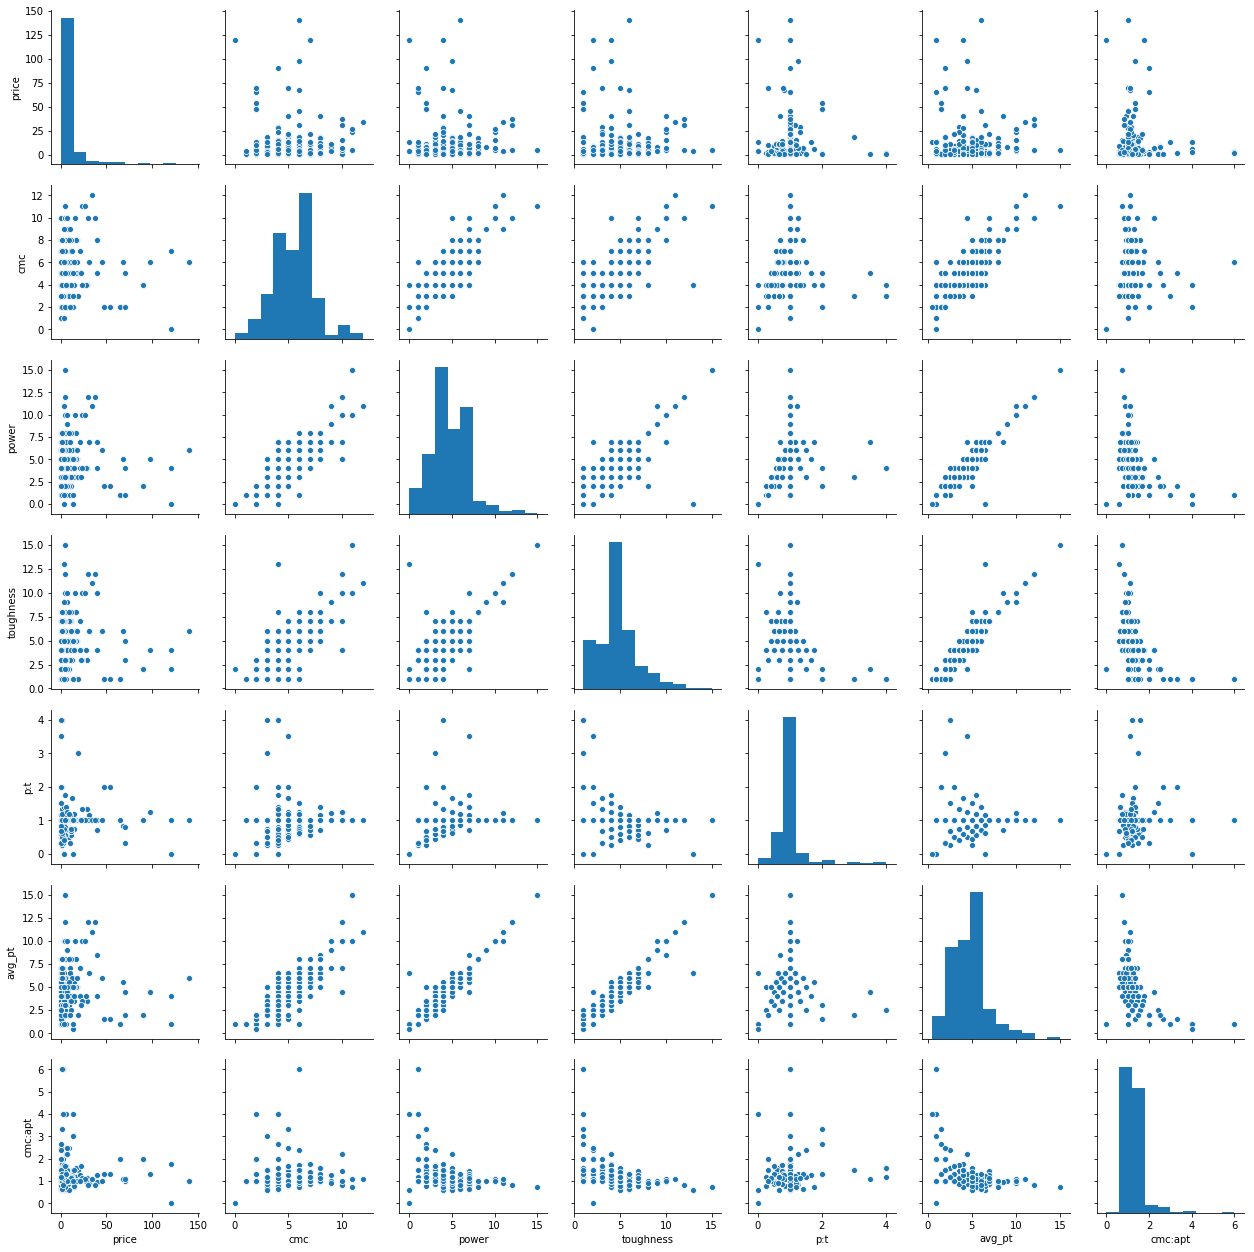

In [175]:
features = ['price','cmc','power','toughness','p:t','avg_pt','cmc:apt']
sns.pairplot(perfected_form[perfected_form['pt_type']=='static'][features].astype(float))

In [176]:
perfected_form[perfected_form['price']>100][['cardname','setname','price','timestamp']]

,cardname,setname,price,timestamp
165,Wurmcoil Engine,Kaladesh Inventions,140.0,1528417917077
168,Sword of War and Peace,Kaladesh Inventions,120.0,1528417917077
173,Platinum Angel,Kaladesh Inventions,120.0,1529109117077
176,Paradox Engine,Kaladesh Inventions,115.0,1529083915410
177,Ornithopter,Kaladesh Inventions,120.0,1528417917077
178,Oblivion Stone,Kaladesh Inventions,105.0,1528417917077
181,Chalice of the Void,Kaladesh Inventions,204.5,1529109117069
183,Arcbound Ravager,Kaladesh Inventions,180.0,1528417917069
185,Sword of Fire and Ice,Kaladesh Inventions,170.0,1529070462264
186,Sword of Feast and Famine,Kaladesh Inventions,149.0,1528465662264


In [177]:
connection = connect_mystic()

http://gatherer.wizards.com/Pages/Card/Details.aspx?multiverseid=409796

http://gatherer.wizards.com/Pages/Card/Details.aspx?multiverseid=414346   

In [28]:
cards_df = pd.read_csv('data/all_vintage_cards.csv')
cards_df.rename(index=str, columns={"name": "cardname", "set_name": "setname"}, inplace=True)
cards_df.head()

C:\Users\alexg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,cardname,setname,type_line,mana_cost,rarity,oracle_text,power,toughness,loyalty,cmc,set,color_identity,colors,reprint,layout,legalities
0,ff92804a-0c62-4eb8-bbba-f1ca6f426b6e,"Urborg, Tomb of Yawgmoth",Ultimate Box Topper,Legendary Land,NaN,mythic,Each land is a Swamp in addition to its other ...,NaN,NaN,NaN,0.0,puma,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."
1,5e63fd70-ca5b-45fd-b551-9ebe02410e9c,Stirring Wildwood,Ultimate Box Topper,Land,NaN,mythic,Stirring Wildwood enters the battlefield tappe...,NaN,NaN,NaN,0.0,puma,"['G', 'W']",[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."
2,54f41726-e0bb-4154-a2db-4b68b50f5032,Raging Ravine,Ultimate Box Topper,Land,NaN,mythic,Raging Ravine enters the battlefield tapped.\r...,NaN,NaN,NaN,0.0,puma,"['G', 'R']",[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."
3,7c9fb3d9-e018-4aa3-9c14-1a51fae176b4,Lavaclaw Reaches,Ultimate Box Topper,Land,NaN,mythic,Lavaclaw Reaches enters the battlefield tapped...,NaN,NaN,NaN,0.0,puma,"['B', 'R']",[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."
4,ff790ded-af9f-4e93-84b7-ddadff5ccad4,Karakas,Ultimate Box Topper,Legendary Land,NaN,mythic,{T}: Add {W}.\r\n{T}: Return target legendary ...,NaN,NaN,NaN,0.0,puma,['W'],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."


In [32]:
cards_df.merge(filled_df, on=['cardname', 'setname'])

,id,cardname,setname,type_line,mana_cost,rarity,oracle_text,power,toughness,loyalty,cmc,set,color_identity,colors,reprint,layout,legalities,timestamp,price
0,ba9d2384-5c3f-4eb1-86b4-26ee13f1c767,"Chandra, Bold Pyromancer",Dominaria,Legendary Planeswalker — Chandra,{4}{R}{R},mythic,"+1: Add {R}{R}. Chandra, Bold Pyromancer deals...",NaN,NaN,5,6.0,dom,['R'],['R'],False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1541350580379,5.0
1,eb2b7388-ac6b-45c0-a5cc-da6450724b59,"Teferi, Timebender",Dominaria,Legendary Planeswalker — Teferi,{4}{W}{U},mythic,+2: Untap up to one target artifact or creatur...,NaN,NaN,5,6.0,dom,"['U', 'W']","['U', 'W']",False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780379,5.0
2,d4581fc0-551c-4ee5-bde0-65c2b8cdf1b7,Weatherlight,Dominaria,Legendary Artifact — Vehicle,{4},mythic,Flying\r\nWhenever Weatherlight deals combat d...,4,5,NaN,4.0,dom,[],[],False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780377,0.5
3,66024e69-ad60-4c9a-a0ca-da138d33ad80,Mox Amber,Dominaria,Legendary Artifact,{0},mythic,{T}: Add one mana of any color among legendary...,NaN,NaN,NaN,0.0,dom,[],[],False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780376,6.8
4,5d10b752-d9cb-419d-a5c4-d4ee1acb655e,"Teferi, Hero of Dominaria",Dominaria,Legendary Planeswalker — Teferi,{3}{W}{U},mythic,+1: Draw a card. At the beginning of the next ...,NaN,NaN,4,5.0,dom,"['U', 'W']","['U', 'W']",False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780374,47.0
5,c654737d-34ac-42ff-ae27-3a3bbb930fc1,"Muldrotha, the Gravetide",Dominaria,Legendary Creature — Elemental Avatar,{3}{B}{G}{U},mythic,"During each of your turns, you may play up to ...",6,6,NaN,6.0,dom,"['B', 'G', 'U']","['B', 'G', 'U']",False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780374,3.5
6,73cf8c6b-1322-4bc5-a604-6e372607fae4,"Jhoira, Weatherlight Captain",Dominaria,Legendary Creature — Human Artificer,{2}{U}{R},mythic,"Whenever you cast a historic spell, draw a car...",3,3,NaN,4.0,dom,"['R', 'U']","['R', 'U']",False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780374,1.4
7,9459ffca-5a1f-4641-88d4-8a499b261faa,Darigaaz Reincarnated,Dominaria,Legendary Creature — Dragon,{4}{B}{R}{G},mythic,"Flying, trample, haste\r\nIf Darigaaz Reincarn...",7,7,NaN,7.0,dom,"['B', 'G', 'R']","['B', 'G', 'R']",False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780373,0.4
8,5233ad7b-2903-4736-b13a-5cd4a275eb61,"Multani, Yavimaya's Avatar",Dominaria,Legendary Creature — Elemental Avatar,{4}{G}{G},mythic,"Reach, trample\r\nMultani, Yavimaya's Avatar g...",0,0,NaN,6.0,dom,['G'],['G'],False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780372,1.7
9,16db785c-cf82-4caa-aef6-8c61d9bec7c6,Verix Bladewing,Dominaria,Legendary Creature — Dragon,{2}{R}{R},mythic,Kicker {3} (You may pay an additional {3} as y...,4,4,NaN,4.0,dom,['R'],['R'],False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780370,2.1


In [33]:
rarities = ['mythic','rare', 'uncommon', 'common']
for rarity in rarities:
    print('writing {} prices to csv'.format(rarity))
    price_df = get_recent_prices(rarity)
    merged_df = cards_df.merge(price_df, on=['cardname', 'setname'])
    merged_df.to_csv(path_or_buf='data/all_vintage_cards-{}_recent.csv'.format(rarity))

writing mythic prices to csv
writing rare prices to csv
writing uncommon prices to csv
writing common prices to csv


### Ready for Mythic MVP

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [210]:
raw_mythic = pd.read_csv('data/all_vintage_cards-mythic_recent.csv')
raw_mythic.drop(columns='Unnamed: 0', inplace=True)
raw_mythic.set_index('id', inplace=True)

raw_mythic = raw_mythic[(raw_mythic['setname']!='Kaladesh Inventions') & (raw_mythic['setname']!='Zendikar Expeditions')]

abberant_researcher = CreatureFeatureTransformer()
planeswalker = PlaneswalkerTransformer()
raw_mythic_eng = aberrant_researcher.transform(raw_mythic)
raw_mythic_eng = planeswalker.transform(raw_mythic_eng)
raw_mythic_eng.head(10)

,cardname,setname,type_line,mana_cost,rarity,oracle_text,power,toughness,loyalty,cmc,...,reprint,layout,legalities,timestamp,price,pt_type,p:t,avg_pt,cmc:apt,l_type
id,,,,,,,,,,,,,,,,,,,,,
ba9d2384-5c3f-4eb1-86b4-26ee13f1c767,"Chandra, Bold Pyromancer",Dominaria,Legendary Planeswalker — Chandra,{4}{R}{R},mythic,"+1: Add {R}{R}. Chandra, Bold Pyromancer deals...",0,0,5,6.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1541350580379,5.0,none,NaN,NaN,NaN,static
eb2b7388-ac6b-45c0-a5cc-da6450724b59,"Teferi, Timebender",Dominaria,Legendary Planeswalker — Teferi,{4}{W}{U},mythic,+2: Untap up to one target artifact or creatur...,0,0,5,6.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780379,5.0,none,NaN,NaN,NaN,static
d4581fc0-551c-4ee5-bde0-65c2b8cdf1b7,Weatherlight,Dominaria,Legendary Artifact — Vehicle,{4},mythic,Flying\r\r\nWhenever Weatherlight deals combat...,4,5,0,4.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780377,0.5,static,0.8,4.5,0.888889,variable
66024e69-ad60-4c9a-a0ca-da138d33ad80,Mox Amber,Dominaria,Legendary Artifact,{0},mythic,{T}: Add one mana of any color among legendary...,0,0,0,0.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780376,6.8,none,NaN,NaN,NaN,variable
5d10b752-d9cb-419d-a5c4-d4ee1acb655e,"Teferi, Hero of Dominaria",Dominaria,Legendary Planeswalker — Teferi,{3}{W}{U},mythic,+1: Draw a card. At the beginning of the next ...,0,0,4,5.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780374,47.0,none,NaN,NaN,NaN,static
c654737d-34ac-42ff-ae27-3a3bbb930fc1,"Muldrotha, the Gravetide",Dominaria,Legendary Creature — Elemental Avatar,{3}{B}{G}{U},mythic,"During each of your turns, you may play up to ...",6,6,0,6.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780374,3.5,static,1.0,6.0,1.000000,variable
73cf8c6b-1322-4bc5-a604-6e372607fae4,"Jhoira, Weatherlight Captain",Dominaria,Legendary Creature — Human Artificer,{2}{U}{R},mythic,"Whenever you cast a historic spell, draw a car...",3,3,0,4.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780374,1.4,static,1.0,3.0,1.333333,variable
9459ffca-5a1f-4641-88d4-8a499b261faa,Darigaaz Reincarnated,Dominaria,Legendary Creature — Dragon,{4}{B}{R}{G},mythic,"Flying, trample, haste\r\r\nIf Darigaaz Reinca...",7,7,0,7.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780373,0.4,static,1.0,7.0,1.000000,variable
5233ad7b-2903-4736-b13a-5cd4a275eb61,"Multani, Yavimaya's Avatar",Dominaria,Legendary Creature — Elemental Avatar,{4}{G}{G},mythic,"Reach, trample\r\r\nMultani, Yavimaya's Avatar...",0,0,0,6.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780372,1.7,variable,NaN,NaN,NaN,variable


In [179]:
raw_mythic_eng['reprint'] = 1*raw_mythic_eng['reprint']
clean_mythic_eng = raw_mythic_eng.fillna(value=-1)
clean_mythic_eng = pd.get_dummies(clean_mythic_eng, columns=['rarity','layout','pt_type','l_type'], prefix='mvp')
drop_features = ['cardname','setname','type_line','mana_cost','oracle_text','set','colors','color_identity','legalities','timestamp','price']

y = clean_mythic_eng['price']
X = clean_mythic_eng.drop(columns=drop_features)

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

gbr = GradientBoostingRegressor()
MVP_model = gbr.fit(X_train,y_train)

In [182]:
y_pred = MVP_model.predict(X_test)

results_df = X_test.merge(clean_mythic_eng, left_index=True, right_index=True)
results_df['pred'] = y_pred
results_df['actual'] = y_test
results_df['diff'] = np.abs(y_pred-y_test)

results_df.head()
results_df[['cardname','pred','actual','diff']].sample(50)

,cardname,pred,actual,diff
id,,,,
0f961cec-2f1f-4cd5-bcc3-72e1deb8779e,"Kydele, Chosen of Kruphix",2.374876,2.5,0.125124
067fac91-2483-4678-b86a-2c54a3a480cf,"Kozilek, Butcher of Truth",25.699637,37.5,11.800363
404d9413-ef57-4b6e-8584-48a1dc7fe6f1,Sphinx's Revelation,5.808265,2.7,3.108265
4a53752c-5689-4939-9a8b-bf59d88d7c6b,Ashcloud Phoenix,2.925679,0.2,2.725679
2db4fe28-e580-479b-910f-b719d69468b1,Misthollow Griffin,2.382164,0.7,1.682164
1cbf8933-32a1-4892-9bdc-89464ed9ce1b,Dragonlord Kolaghan,5.163559,4.1,1.063559
755c95c9-eead-486a-9a0e-384cc3143f6c,Soul of New Phyrexia,3.987586,1.5,2.487586
0c6ace49-ee77-460a-88be-fc1c7705302f,"Jarad, Golgari Lich Lord",5.833397,0.8,5.033397
94002868-a48a-4ea8-bfce-17257078f5db,Ugin's Nexus,4.804211,0.3,4.504211


In [184]:
feature_imporances = np.array([list(X.columns), list(MVP_model.feature_importances_)]).T
feature_imporances[feature_imporances[:,1].argsort()[::-1]]

### Try fitting model to rares

In [216]:
raw_rare = pd.read_csv('data/all_vintage_cards-rare_recent.csv')
raw_rare.drop(columns='Unnamed: 0', inplace=True)
raw_rare.drop_duplicates(inplace=True)
raw_rare.set_index('id', inplace=True)

raw_rare = raw_rare[(raw_rare['setname']!='Kaladesh Inventions') & (raw_rare['setname']!='Zendikar Expeditions')]

abberant_researcher = CreatureFeatureTransformer()
planeswalker = PlaneswalkerTransformer()
raw_rare_eng = aberrant_researcher.transform(raw_rare)
raw_rare_eng = planeswalker.transform(raw_rare_eng)
raw_rare_eng.head(10)

raw_rare_eng['reprint'] = 1*raw_rare_eng['reprint']
clean_rare_eng = raw_rare_eng.fillna(value=-1)
clean_rare_eng = pd.get_dummies(clean_rare_eng, columns=['rarity','layout','pt_type','l_type'], prefix='mvp')
drop_features = ['cardname','setname','type_line','mana_cost','oracle_text','set','colors','color_identity','legalities','timestamp','price']

y = clean_rare_eng['price']
X = clean_rare_eng.drop(columns=drop_features)

X_train, X_test, y_train, y_test = train_test_split(X, y)

gbr = GradientBoostingRegressor()
MVP_model = gbr.fit(X_train,y_train)

y_pred = MVP_model.predict(X_test)

results_df = X_test.merge(clean_rare_eng, left_index=True, right_index=True)
results_df['pred'] = y_pred
results_df['actual'] = y_test
results_df['diff'] = np.abs(y_pred-y_test)

results_df.head()
results_df[['cardname','pred','actual','diff']].sample(50)

,cardname,pred,actual,diff
id,,,,
87b5de81-65a6-4a74-8a71-767b92e89e91,Increasing Devotion,6.177736,0.2,5.977736
85a24793-2d19-4e29-bdb9-0b8e0ba90fd3,Decree of Pain,2.906233,2.0,0.906233
8f72584d-f65e-4c8f-be05-f44389c2381d,Nevinyrral's Disk,4.663685,1.0,3.663685
cbfb3c53-1e68-48ce-8008-93bc49e188dd,"Uyo, Silent Prophet",2.282286,0.5,1.782286
57817159-de10-4a68-83e1-971fa9cfee2c,Chance Encounter,10.878001,7.0,3.878001
b1a3f75d-9a79-4c16-8f50-43a18add4579,Spectral Shift,13.711125,0.2,13.511125
af822507-fd4c-454b-ab07-106c81c535bf,Krosan Beast,10.408567,1.5,8.908567
78154978-9e7d-44e9-a03f-c578072a8ff7,Cathars' Crusade,6.177736,1.8,4.377736
623e57ed-7ed7-4283-b48f-77ecacad70b0,Ooze Garden,13.711125,0.3,13.411125


In [217]:
feature_importances = np.array([list(X.columns), list(MVP_model.feature_importances_)]).T
feature_importances[feature_imporances[:,1].argsort()[::-1]]

array([['cmc:apt', '0.39165530539450605'],
       ['cmc', '0.1822031116576262'],
       ['p:t', '0.14181638407691927'],
       ['avg_pt', '0.07147610427714379'],
       ['power', '0.0596107926742585'],
       ['reprint', '0.059420682940392135'],
       ['toughness', '0.049660831754874735'],
       ['mvp_saga', '0.022216948088659417'],
       ['mvp_variable', '0.020347596881367558'],
       ['mvp_none', '0.0015922422542524928'],
       ['loyalty', '0.0'],
       ['mvp_variable', '0.0'],
       ['mvp_static', '0.0'],
       ['mvp_leveler', '0.0'],
       ['mvp_normal', '0.0'],
       ['mvp_static', '0.0'],
       ['mvp_rare', '0.0']], dtype='<U21')

### PIPELINING

In [218]:
from sklearn.pipeline import Pipeline

In [ ]:
raw_rare = pd.read_csv('data/all_vintage_cards-rare_recent.csv')

# ReadCSVTransformer
raw_rare.drop(columns='Unnamed: 0', inplace=True)
raw_rare.drop_duplicates(inplace=True)
raw_rare.set_index('id', inplace=True)

# SetExclusionTransformer
raw_rare = raw_rare[(raw_rare['setname']!='Kaladesh Inventions') & (raw_rare['setname']!='Zendikar Expeditions')]

# Already done
abberant_researcher = CreatureFeatureTransformer()
planeswalker = PlaneswalkerTransformer()
raw_rare_eng = aberrant_researcher.transform(raw_rare)
raw_rare_eng = planeswalker.transform(raw_rare_eng)

# Bool transforms and fillna's
raw_rare_eng['reprint'] = 1*raw_rare_eng['reprint']
clean_rare_eng = raw_rare_eng.fillna(value=-1)

# Dummify
clean_rare_eng = pd.get_dummies(clean_rare_eng, columns=['rarity','layout','pt_type','l_type'], prefix='mvp')

# Drop cats
drop_features = ['cardname','setname','type_line','mana_cost','oracle_text','set','colors','color_identity','legalities','timestamp','price']

y = clean_rare_eng['price']
X = clean_rare_eng.drop(columns=drop_features)

X_train, X_test, y_train, y_test = train_test_split(X, y)

gbr = GradientBoostingRegressor()
MVP_model = gbr.fit(X_train,y_train)

y_pred = MVP_model.predict(X_test)

results_df = X_test.merge(clean_rare_eng, left_index=True, right_index=True)
results_df['pred'] = y_pred
results_df['actual'] = y_test
results_df['diff'] = np.abs(y_pred-y_test)

results_df.head()
results_df[['cardname','pred','actual','diff']].sample(50)